<a href="https://colab.research.google.com/github/Utsav-J/BinaryImageClassification/blob/main/BinaryImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                            #executing required shell commands
!mkdir -p ~/.kaggle         #creating a parent directory using -p tag
!cp kaggle.json ~/.kaggle/  #copying the API file to the recent directory

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 262MB/s]
100% 1.06G/1.06G [00:11<00:00, 104MB/s]


In [ ]:
from zipfile import ZipFile                 #for extracting the data

zip_location  = "/content/dogs-vs-cats.zip" #copied the path location
extract_location = "/content"               #the location where it will be extracted
zip_ref = ZipFile(zip_location)             #creating the reference to our zipfile
zip_ref.extractall(extract_location)        #extracting the files
zip_ref.close()                             #closing reference after use


#deletitng the variables that we dont need anymore
del zip_location
del extract_location


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential

In [ ]:
from keras.utils.image_dataset import image_dataset_from_directory
#gotta train our model with the help of files in the train folder
#used generators for this purpose, batchwise operation

training_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/train",   #location of directory
    labels = 'inferred',            #since we gonna use subdirectories
    label_mode = 'int',             #for encoding labels as integers
    batch_size = 32,                #each batch will have 32 images
    image_size = (256,256)          #each of size 256x256
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# converting all the numpy arrays to normalized values
# all the images stored have a value from 0-255
# normalizing changes that value from 0-1
def process(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

training_dataset = training_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
# we gonna make layer wise CNN for this purpose
# first layer will hae 32 filters
# second will have 64 filters (notice the x2 pattern)
# and so on


model= Sequential()
layer_2d_conv = Conv2D(filters=32,
                       kernel_size = (3,3),
                       padding = 'valid',
                       activation  ='relu',
                       input_shape = (256,256,3))
model.add(layer_2d_conv)
model.add(BatchNormalization())

In [ ]:
pooling_layer = MaxPooling2D(pool_size = (2,2),
                             strides = 2,
                             padding = 'valid')

In [ ]:
model.add(pooling_layer)
c_layer2 = Conv2D(filters=64,
                       kernel_size = (3,3),
                       padding = 'valid',
                       activation  ='relu',
                       )

c_layer3 = Conv2D(filters=128,
                       kernel_size = (3,3),
                       padding = 'valid',
                       activation  ='relu',
                  )

In [ ]:
model.add(c_layer2)
model.add(BatchNormalization())
model.add(pooling_layer)
model.add(c_layer3)
model.add(BatchNormalization())
model.add(pooling_layer)
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer =  "adam",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
all_fits = model.fit(training_dataset,epochs = 10, validation_data= validation_dataset)

Epoch 1/10
625/625 [==============================] - 80s 104ms/step - loss: 1.3142 - accuracy: 0.5874 - val_loss: 0.6489 - val_accuracy: 0.6034
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6131 - accuracy: 0.6651 - val_loss: 0.5864 - val_accuracy: 0.6882
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5251 - accuracy: 0.7348 - val_loss: 0.5421 - val_accuracy: 0.7262
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4822 - accuracy: 0.7606 - val_loss: 0.7176 - val_accuracy: 0.7078
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4496 - accuracy: 0.7794 - val_loss: 0.5025 - val_accuracy: 0.7670
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3936 - accuracy: 0.8095 - val_loss: 0.5572 - val_accuracy: 0.7404
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3426 - accuracy: 0.8383 - val_loss: 0.5579 - val_ac

In [ ]:
fits_after_normalization = model.fit(training_dataset,epochs = 10, validation_data = validation_dataset)

Epoch 1/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1569 - accuracy: 0.9262 - val_loss: 0.5227 - val_accuracy: 0.8190
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1331 - accuracy: 0.9364 - val_loss: 0.5961 - val_accuracy: 0.8038
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1201 - accuracy: 0.9434 - val_loss: 0.5660 - val_accuracy: 0.7936
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1147 - accuracy: 0.9464 - val_loss: 0.4761 - val_accuracy: 0.8282
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0997 - accuracy: 0.9514 - val_loss: 0.5389 - val_accuracy: 0.8298
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0906 - accuracy: 0.9570 - val_loss: 0.5255 - val_accuracy: 0.8052
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0743 - accuracy: 0.9621 - val_loss: 0.6396 - val_ac

In [ ]:
import matplotlib.pyplot as plt


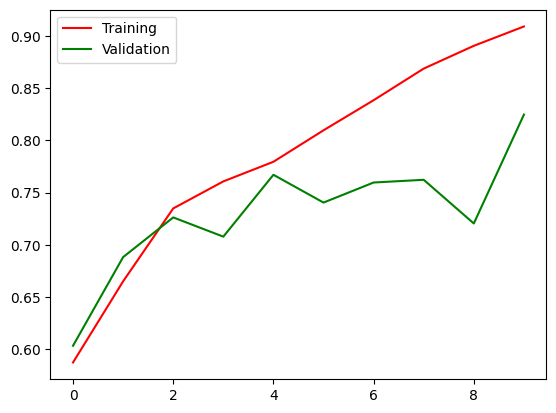

In [ ]:
plt.plot(all_fits.history['accuracy'],color = "red",label = "Training")
plt.plot(all_fits.history['val_accuracy'],color = 'green',label = "Validation")
plt.legend()
plt.show()

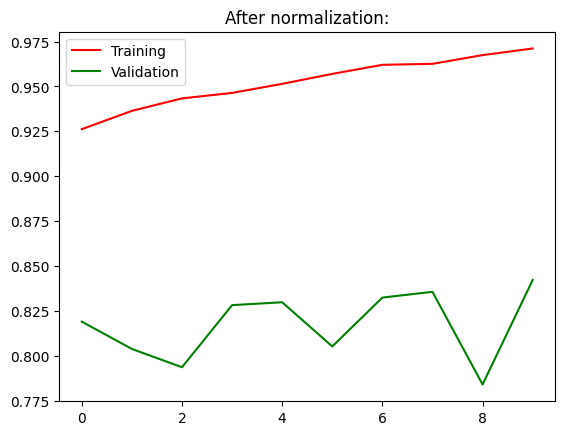

In [ ]:
plt.plot(fits_after_normalization.history['accuracy'],color = "red",label = "Training")
plt.title("After normalization:")
plt.plot(fits_after_normalization.history['val_accuracy'],color = 'green',label = "Validation")
plt.legend()
plt.show()

In [ ]:
import cv2 as cv
def binaryClassify(image_path):
  orig = cv.imread(image_path)
  test_image = cv.imread(image_path)
  # test_image.shape()
  test_image = cv.resize(test_image, (256,256))
  fed_to_model = test_image.reshape((1,256,256,3))
  result = model.predict(fed_to_model)
  if (result[0,0] == 0):
    plt.imshow(orig)
    plt.title("CAT")
  else:
    plt.imshow(orig)
    plt.title("DOG")

1/1 [==============================] - 0s 19ms/step


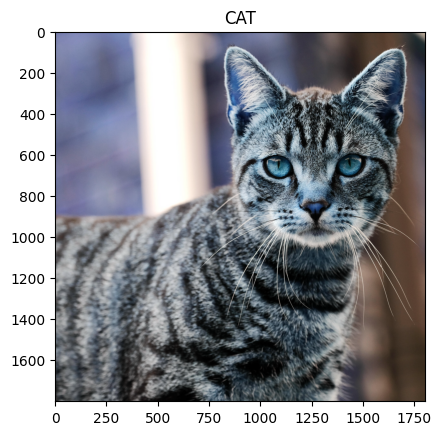

In [ ]:
binaryClassify("/content/dumbcat.jpg")

1/1 [==============================] - 0s 29ms/step


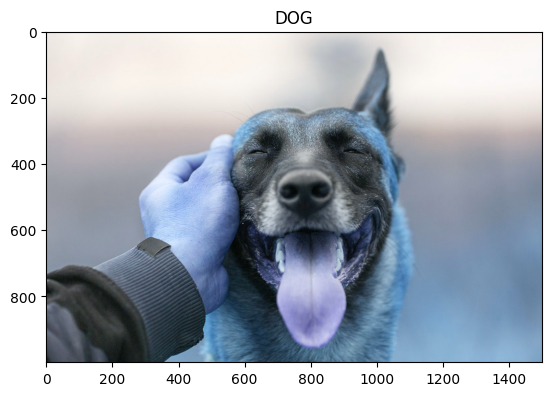

In [ ]:
binaryClassify("/content/dumbdog.jpg")